# Group 17

### Problem Statement : Classification – Unsupervised – KNN – Fraudulent credit card transactions

The dataset we will use contains transactions made by credit cards in September 2013 by European cardholders. The dataset has been collected and analyzed during a research collaboration of Worldline and the Machine Learning Group of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
The dataset contains 31 columns, only 3 columns make sense which are Time, Amount
and Class (fraud or not fraud). If required use PCA to reduce unnecessary dimensions.

In [1]:
#import the necessary libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set()
warnings.simplefilter('ignore')

#load the dataset 
df1= pd.read_csv("creditcard.csv")
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
#check for null values
df1.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [3]:
df1.shape

(284807, 31)

In [4]:
#check the data types
df1.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
df1.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
#counting the number of fraud and non-fraud cases
df1.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Here observe carefully how imbalanced our original dataset actually is! Most of the dataset values are non-fraud transactions. If we were to use this for our models and analysis, we might end up with a lot of errors and our algorithms will most likely end up overfitting since it will "assume" that most transactions are not fraud. Hence we will train our model accordingly to detect patterns that give signs of fraud!

In [7]:
# In this dataset the class values are heavily skewed which means that there are too many samples of 0 class 
print('Number of Non-Frauds', round(df1['Class'].value_counts()[0]/len(df1) * 100,2), '% of the dataset')
print('Number of Frauds', round(df1['Class'].value_counts()[1]/len(df1) * 100,2), '% of the dataset')

Number of Non-Frauds 99.83 % of the dataset
Number of Frauds 0.17 % of the dataset


<AxesSubplot:xlabel='Class', ylabel='count'>

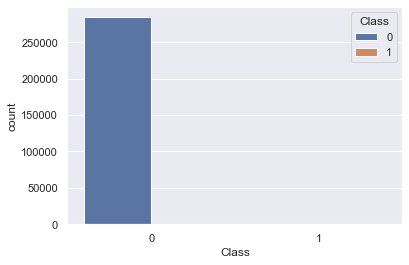

In [8]:
sns.countplot(x=df1.Class, hue=df1.Class)

<AxesSubplot:xlabel='Amount', ylabel='Density'>

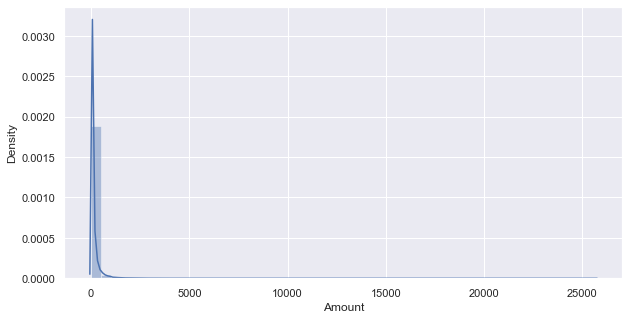

In [9]:
#plotting the graph of Amount against sample density
plt.figure(figsize=(10, 5))
sns.distplot(df1.Amount)

Now, let's set use bins and their labels as by looking at the calculated statistics, we gather the idea that the data is highly imbalanced since only 492 out of 284807 are fraud.

Binning is when we perform transformation of numerical variables and convert them into categorical counterparts.This not only  improves accuracy of the predictive models but also reduces noise ( non-linearity). Hence, we can easily identify outliers, invalid and missing values out of numerical dataset.

In [10]:
df1['Bins Amount'] = ''

In [16]:
def create_bins(predictor, size=50):
    '''
    This function takes a predictor value and size of bins 
    It returns bins and the corresponding bin labels
    '''
    bin1 = np.linspace(predictor.min(), predictor.max(), num=size)

    labels = []

    # Index of the final element in bins list
    bins_last_index = bin1.shape[0] - 1

    for id1, value in enumerate(bin1):
        if id1 == bins_last_index:
            continue
        val_to_put = str(int(bin1[id1])) + ' to ' + str(int(bin1[id1+ 1]))
        labels.append(val_to_put)
    
    return bin1, labels

In [17]:
bin1, labels = create_bins(df1.Amount, size=10)

Add bins in the column Bins Amount.

In [18]:
df1['Bins Amount'] = pd.cut(df1.Amount, bins=bin1,
                           labels=labels, include_lowest=True)
df1['Bins Amount'].head().to_frame()

,Bins Amount
0,0 to 2854
1,0 to 2854
2,0 to 2854
3,0 to 2854
4,0 to 2854


In [19]:
df1['Bins Amount'].value_counts()

0 to 2854         284484
2854 to 5709         285
5709 to 8563          28
8563 to 11418          4
11418 to 14272         3
17127 to 19982         2
22836 to 25691         1
19982 to 22836         0
14272 to 17127         0
Name: Bins Amount, dtype: int64

Let's plot the bin visualization for a better idea

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0 to 2854'),
  Text(1, 0, '2854 to 5709'),
  Text(2, 0, '5709 to 8563'),
  Text(3, 0, '8563 to 11418'),
  Text(4, 0, '11418 to 14272'),
  Text(5, 0, '14272 to 17127'),
  Text(6, 0, '17127 to 19982'),
  Text(7, 0, '19982 to 22836'),
  Text(8, 0, '22836 to 25691')])

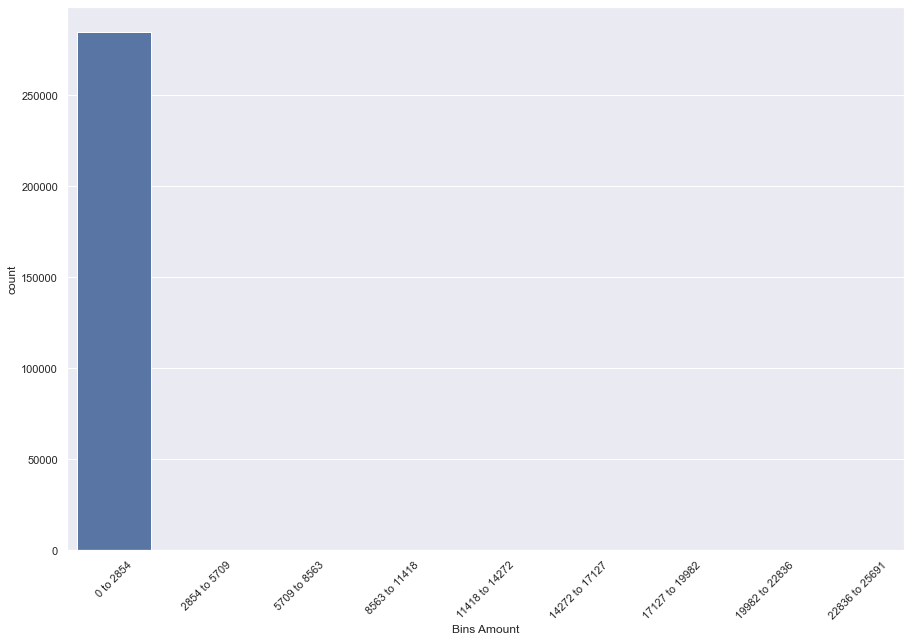

In [20]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Bins Amount', data=df1)
plt.xticks(rotation=45)

 Bins other than the first one '0 to 2854' are difficult to view so let's remove it for the time being 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0 to 2854'),
  Text(1, 0, '2854 to 5709'),
  Text(2, 0, '5709 to 8563'),
  Text(3, 0, '8563 to 11418'),
  Text(4, 0, '11418 to 14272'),
  Text(5, 0, '14272 to 17127'),
  Text(6, 0, '17127 to 19982'),
  Text(7, 0, '19982 to 22836'),
  Text(8, 0, '22836 to 25691')])

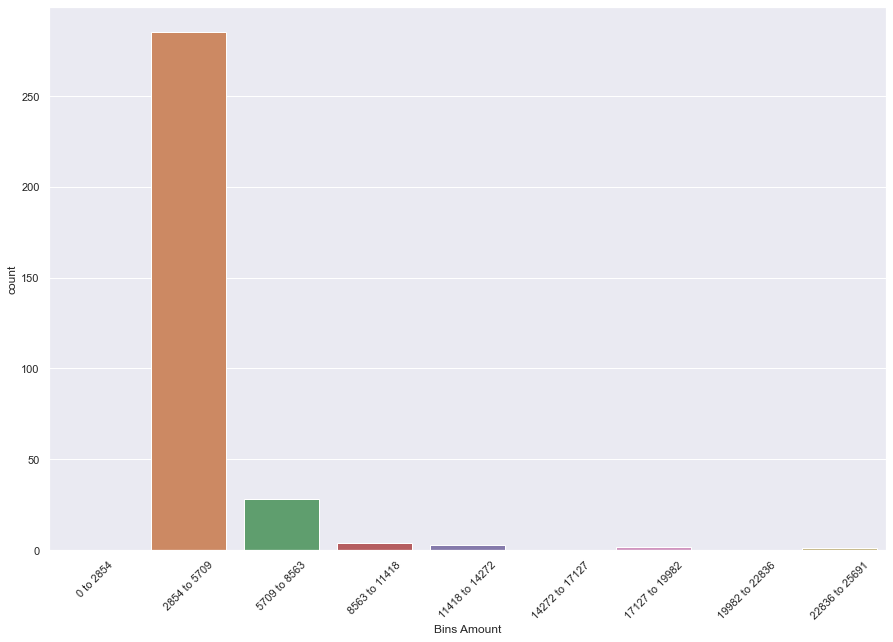

In [21]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Bins Amount', data=df1[~(df1['Bins Amount'] == '0 to 2854')])
plt.xticks(rotation=45)

Let us normalise the amount column as it is not in line with the anonimised features and drop those columns now for preparing the dataset processing and model fitting

In [23]:
from sklearn.preprocessing import StandardScaler

df1['normAmount'] = StandardScaler().fit_transform(df1['Amount'].values.reshape(-1, 1))
data = df1.drop(['Time','Amount','Bins Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [24]:
X1 = data.drop(['Class'],axis=1)
y1 = data['Class']

For 'Resampling',we have made use of  SMOTE (Synthetic Minority Over-Sampling Technique), which perfectly combines oversampling and undersampling, but the oversampling approach is not by replicating minority class but creating new minority class data instance via an algorithm.

We will under sample the dataset by creating a 50/50 ratio by randomly selecting "x" amount of sample from the majority class, being "x" the total number of records with the minority class.

In [25]:
# Calculating the number of fraud or minority data points
fraud_records = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

# Picking the indices of the non-fraud or normal classes
normal_indices = data[data.Class == 0].index

# Out of the indices we just picked, randomly select "x" number 
random_normal = np.random.choice(normal_indices, fraud_records, replace = False)
random_normal = np.array(random_normal)

# Appending those 2 calculated indices
under_sample = np.concatenate([fraud_indices,random_normal])

# computing the under sample dataset
under_sample_data = data.iloc[under_sample,:]

X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']


In [26]:
# Display ratio after normalisation
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


In [27]:
from sklearn.model_selection import train_test_split

# For the Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size = 0.3, random_state = 0)

print("Train dataset: ", len(X_train))
print("Test dataset: ", len(X_test))
print("Total number : ", len(X_train)+len(X_test))

# Undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)
print("")
print("Train dataset: ", len(X_train_undersample))
print("Test dataset: ", len(X_test_undersample))
print("Total number: ", len(X_train_undersample)+len(X_test_undersample))

Train dataset:  199364
Test dataset:  85443
Total number :  284807

Train dataset:  688
Test dataset:  296
Total number:  984


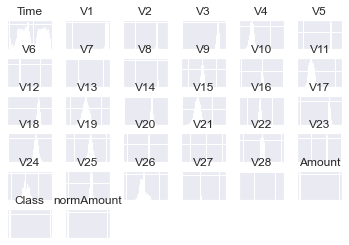

In [28]:
from matplotlib import pyplot

ax=df1.hist(bins=100)
for a in ax.flatten():
    a.set_xticklabels([])
    a.set_yticklabels([])
pyplot.show()

In [29]:
import time
from sklearn.decomposition import PCA
X1 = data.drop('Class', axis=1)
y1 = data['Class']

#performing pca transformations on the dataset for a better idea
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X1.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

PCA took 0.64 s


In [30]:
X_reduced_pca

array([[ 1.32228759, -0.38908479],
       [-1.26968587, -0.07888385],
       [ 1.83430059,  1.34219591],
       ...,
       [-1.75640013,  0.93482227],
       [ 0.05681581, -0.68813209],
       [ 0.68641143,  0.27518912]])

In [31]:
xtrainS, xtestS, ytrainS, ytestS = train_test_split(X1, y1, random_state=42, test_size=0.30, shuffle=True)
print(xtrainS.shape, ytrainS.shape)
print(xtestS.shape, ytestS.shape)

(199364, 29) (199364,)
(85443, 29) (85443,)


In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=15)

knn.fit(xtrainS,ytrainS)

KNeighborsClassifier(n_neighbors=15)

In [33]:
knn_pred =knn.predict(xtestS)

# Importing the required metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

knn_recall = recall_score(ytestS, knn_pred)
knn_recall

0.7794117647058824

In [34]:
from sklearn.metrics import f1_score
lr_f1 = f1_score(ytestS, knn_pred)
lr_f1

0.8030303030303031

In [35]:
from sklearn.metrics import classification_report
print(classification_report(ytestS, knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.83      0.78      0.80       136

    accuracy                           1.00     85443
   macro avg       0.91      0.89      0.90     85443
weighted avg       1.00      1.00      1.00     85443



In [36]:
knn_pred_test_prob = knn.predict_proba(xtestS)[:, 1]

from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, threshold = roc_curve(ytestS, knn_pred_test_prob)

knn_auc = roc_auc_score(ytestS, knn_pred_test_prob)
knn_auc

0.9519350180903711

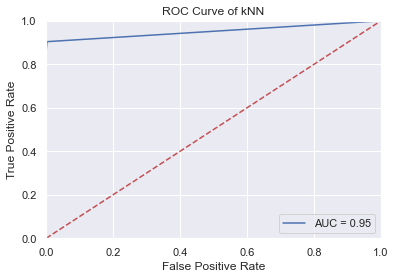

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()